In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
# from yuan.utils.plots import chinese_setting  # 让matplotlib正常显示中文
# chinese_setting()

plt.rcParams['font.sans-serif'] = [u'SimHei']  # 画图正常显示中文
plt.rcParams['axes.unicode_minus'] = False

# 1，加载数据：
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'  # 'sepal length', 'sepal width', 'petal length', 'petal width'
data = pd.read_csv('../DataSets/iris.data', header=None)
x, y = data[list(range(4))], data[4]
y = pd.Categorical(y).codes
x = x[[0, 1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=28, train_size=0.6)

/home/jesse/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [2]:
# 2，模型训练：
svm = SVC(C=1, kernel='sigmoid')  # C：松弛变量权重；kernel：核函数

start = time.time()
svm.fit(x_train, y_train)
end = time.time()
svm_score = accuracy_score(y_train, svm.predict(x_train))
print('cost time: ', end-start, 'score: ', svm_score)

cost time:  0.0037403106689453125 score:  0.35555555555555557


/home/jesse/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


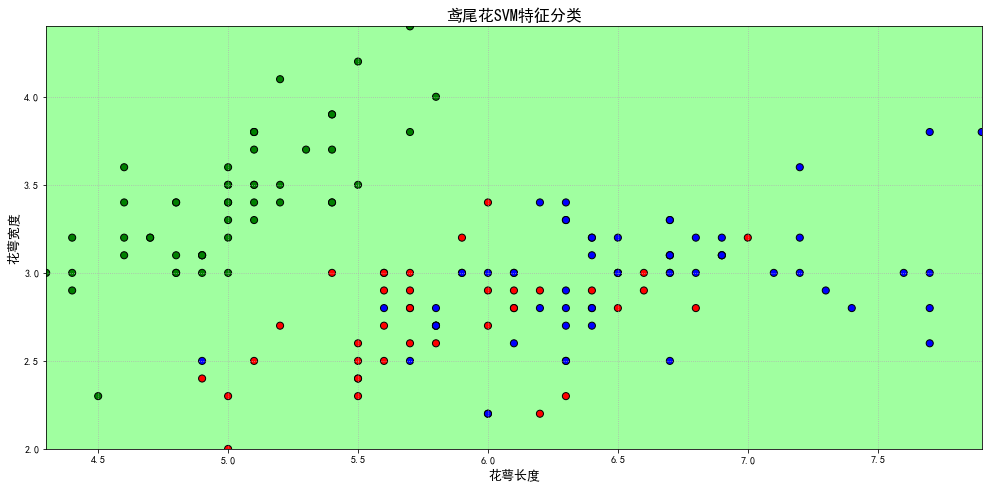

In [3]:
# 3，画图：
N = 500
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)                 # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点


svm_grid_hat = svm.predict(grid_show)          # 获取测试值
svm_grid_hat = svm_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同


cm_light = matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w', figsize=(14,7))


plt.pcolormesh(x1, x2, svm_grid_hat, cmap=cm_light)
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
plt.xlabel(iris_feature[0], fontsize=13)   # lable列表
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM特征分类', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()